# Chapter 9 그래프와 시각화
- 맷플롯립(matplotlib): 그래프를 위한 데스크톱 패키지
- 운영체제의 다양한 GUI 백엔드를 지원하며 PDF, SVG, JPG, PNG, BMP, GIF 등의 형식으로 그래프 저장 가능
- 시본(seaborn)

In [1]:
import pandas as pd
import numpy as np

In [2]:
# 저자 깃허브 주소
path = 'https://raw.githubusercontent.com/wesm/pydata-book/refs/heads/3rd-edition/examples/'

In [36]:
# 그래프를 노트북의 셀 안에 표시하도록 설정
%matplotlib inline

## 9.1 맷플롯립 API 간략하게 사용하기

In [4]:
import matplotlib.pyplot as plt

In [5]:
data = np.arange(10)
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

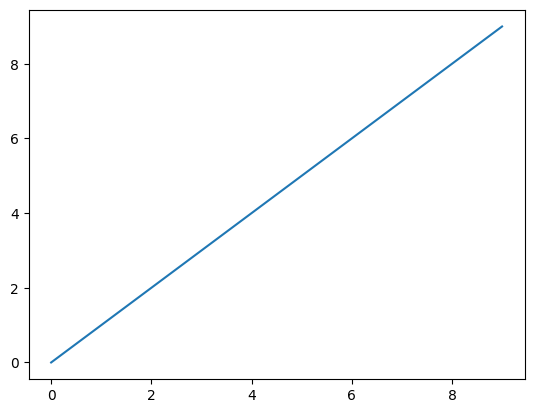

In [6]:
plt.plot(data)

### 9.1.1 피겨와 서브플롯
- 맷플롯립에서 그래프는 피겨 객체 내에 존재
- 새로운 피겨 생성: plt.figure()
- figsize로 파일로 저장할 피겨의 크기와 비율 지정
- 빈 피겨 객체로는 그래프를 만들 수 없으므로, add_subplot을 사용해 최소 하나 이상의 subplots 생성
- ax 객체: 다양한 종류의 그래프를 그리는 여러 메서드 지원
- subplots: 특정한 배치에 맞춰 여러 개의 서브플롯 생성할 수 있는 메서드

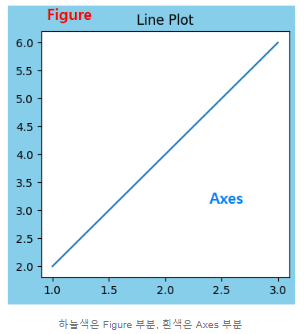

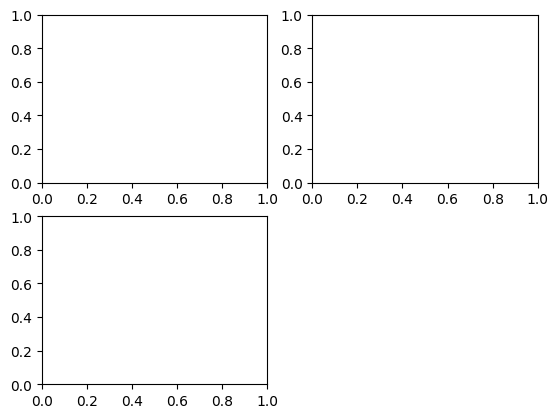

In [12]:
# 새로운 피겨 생성
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1) # 2*2 크기, 첫 번째 서브플롯 선택
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

In [14]:
ax3.plot(np.random.standard_normal(50).cumsum(), color="black",
         linestyle="dashed") # 코드에 검은 점선을 그리는 스타일 옵션 추가
# 맷플롯립은 그래프의 하위 요소를 참조하는 객체 반환

In [19]:
# AxesSubplot 객체에 각 인스턴스 메서드 호출하여 빈 서브플롯에 직접 그래프 그리기
ax1.hist(np.random.standard_normal(100), bins=20, color="black", alpha=0.3); # alpha 옵션은 겹쳐진 그래프의 투명도
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.standard_normal(30));

<ipython-input-21-16bdd5bc80ad>:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[0][0].legend()
<ipython-input-21-16bdd5bc80ad>:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[0][1].legend()
<ipython-input-21-16bdd5bc80ad>:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[1][0].legend()


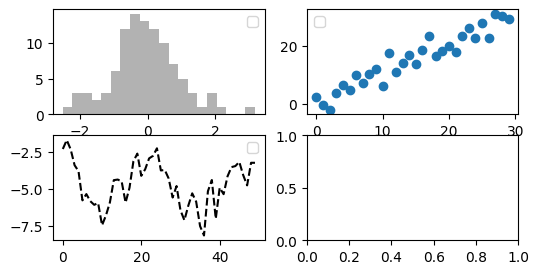

In [21]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(6, 3))

ax[0][0].hist(np.random.standard_normal(100), bins=20, color="black", alpha=0.3)
ax[0][1].scatter(np.arange(30), np.arange(30) + 3 * np.random.standard_normal(30))
ax[1][0].plot(np.random.standard_normal(50).cumsum(), color="black",
         linestyle="dashed")

# 개별 Axes 객체 각각에 범례 설정
ax[0][0].legend()
ax[0][1].legend()
ax[1][0].legend()

plt.show()

#### matplotlib.pyplot.subplots 옵션
- nrows: 서브플롯의 행 수
- ncols: 서브플롯의 열 수
- sharex: 모든 서브플롯이 동일한 x축 눈금을 사용하도록 함(xlim 값 조절 시 모든 서브플롯에 적용)
- sharey: 모든 서브플롯이 동일한 y축 눈금을 사용하도록 함(ylim 값 조절 시 모든 서브플롯에 적용)
- subplot_kw: add_subplot을 사용해서 각 서브플롯 생성 시 사용할 키워드를 담고 있는 딕셔너리
- **fig_kw: 피겨 생성 시 사용할 추가적인 키워드 인수
> 예. plt.subplots(2, 2, figsize=(8, 6)) 과 같음

array([[<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >]], dtype=object)

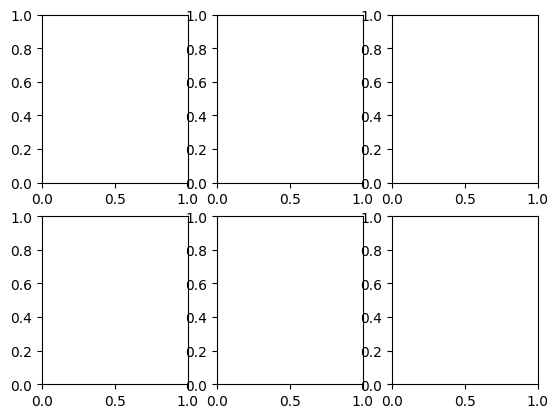

In [23]:
# subplots 메서드
fig, axes = plt.subplots(2, 3) # 2행 3열의 서브플롯 생성
axes

#### 서브플롯 간 간격 조절하기
- 피겨 객체의 subplots_adjust 메서드로 조정
- subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
- wsapce: 피겨의 너비에 대한 비율 조절
- hsapce: 피겨의 높이에 대한 비율 조절

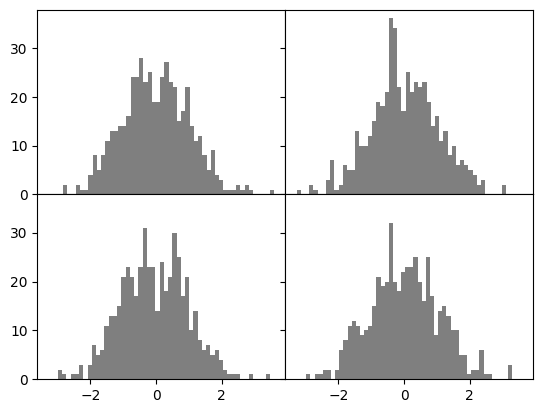

In [25]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
  for j in range(2):
    axes[i, j].hist(np.random.standard_normal(500), bins=50,
                    color="black", alpha=0.5)
fig.subplots_adjust(wspace=0, hspace=0)

### 9.1.2 색상, 마커, 선스타일
- plot 함수는 x와 y 좌푯값이 담긴 배열과 추가적으로 색상과 선 스타일 옵션을 인수로 받음
> ex) ax.plot(x, y, linestyle='--', color='green')
- 마커: 선 그래프에서 특정 지점의 실제 데이터를 강조하기 위함 (마커도 스타일 문자열로 지정 가능)
> ex) marker="o"

In [27]:
plt.plot?

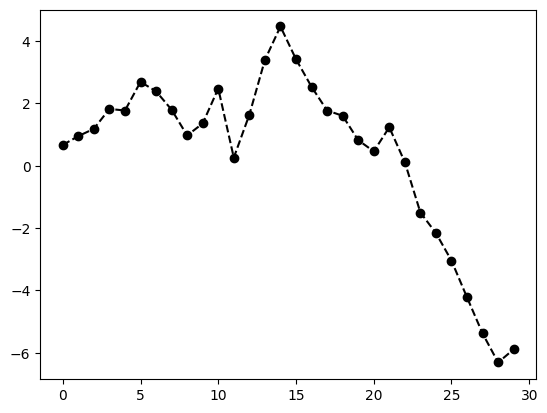

In [42]:
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(np.random.standard_normal(30).cumsum(), color="black",
        linestyle="dashed", marker="o")


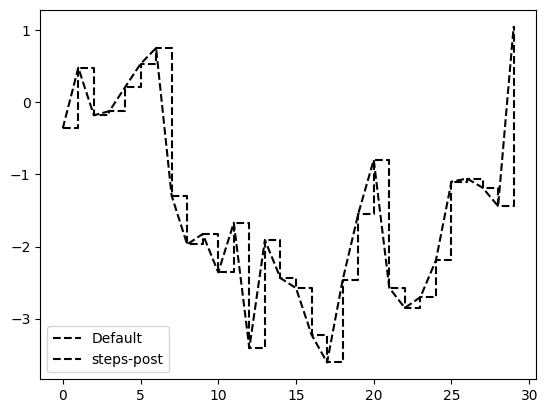

In [44]:
# drawstyle 옵션
fig = plt.figure()
ax = fig.add_subplot()
data = np.random.standard_normal(30).cumsum()

ax.plot(data, color="black", linestyle="dashed", label="Default")
ax.plot(data, color="black", linestyle="dashed",
        drawstyle="steps-post", label="steps-post") # label: 범례 추가(범레명)
ax.legend() # 각 선을 구분하는 범례 포함

### 9.1.3 눈금, 레이블, 범례
- 맷플롯립의 ax 객체 메서드를 통해 그래프 꾸미기 가능
- xlim: 그래프 범위 지정 ax.xlim([0, 10]): x축 범위 0부터 10까지로 설정
- xticks: 눈금 위치 / set_xticks: 전체 데이터 범위에 따라 눈금을 어디에 배치할지 지정
- xticklabels: 눈금 레이블
- rotation 옵션: 축 눈금을 매개변수 만큼 회전
- set_xlabel: x축 이름 지정
- set_title: 서브플롯의 제목 지정
- x 대신에 y를 사용하면 y축에 적용됨
- set 메서드: ax 클래스에서 제공하는 그래프의 속성을 설정하는 메서드

#### 제목, 축 레이블, 눈금, 눈금 레이블 설정하기

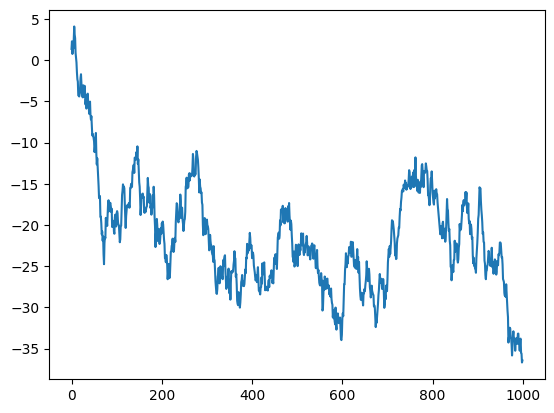

In [50]:
fig, ax = plt.subplots()
ax.plot(np.random.standard_normal(1000).cumsum())

In [51]:
# set_xticks: x축에 눈금 설정
# set_xticklabels: x축에 다른 눈금 설정 시
ticks = ax.set_xticks([0, 250, 500, 750, 1000])

lables = ax.set_xticklabels(["one", "two", "three", "four", "five"],
                            rotation=30, fontsize=8) # rotation 옵션: x축 눈금을 매개변수 만큼 회전

Text(0.5, 1.0, 'My first matplotlib')

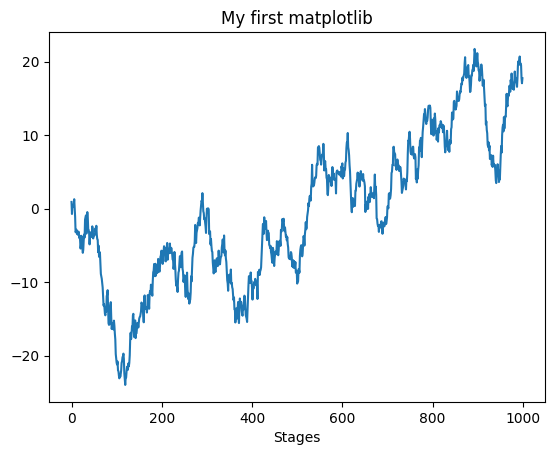

In [53]:
fig, ax = plt.subplots()
ax.plot(np.random.standard_normal(1000).cumsum())

# set_xlabel: x축 이름 지정
# set_title: 서브플롯의 제목 지정
ax.set_xlabel("Stages")
ax.set_title("My first matplotlib")

[Text(0.5, 1.0, 'My first mtplotlib plot'), Text(0.5, 0, 'Stages')]

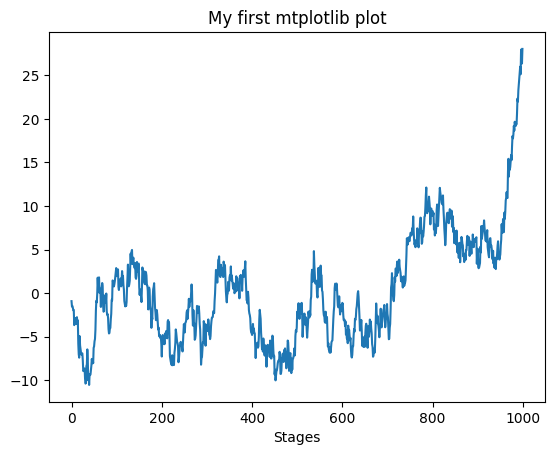

In [55]:
fig, ax = plt.subplots()
ax.plot(np.random.standard_normal(1000).cumsum())

# set 메서드
ax.set(title="My first mtplotlib plot", xlabel="Stages")

#### 범례 추가하기
- 범례: 그래프의 요소를 확인하는 핵심 요소
- 범례 추가를 위해 각 그래프에 label 인수를 넘김
- lgend 메서드는 범례 위치를 지정하는 loc 인수 제공
- loc는 범례를 그래프 어디에 둘지 지정하는 인수로, 기본값은 "best"
- 범례에서 제외하고 싶은 요소가 있을 경우 label 인수를 넘기지 않거나 label="_nolegend_" 옵션 사용

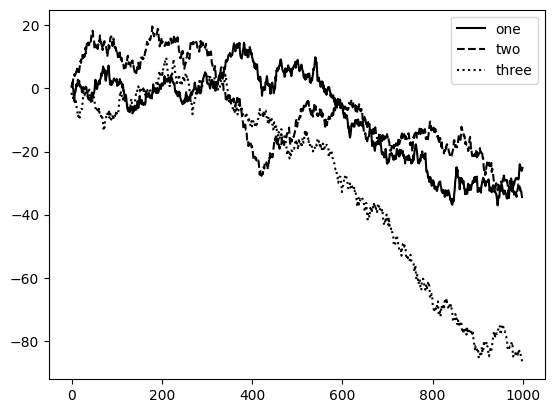

In [57]:
# 세 개의 선과 범례로 구성된 그래프 그리기
fig, ax = plt.subplots()

ax.plot(np.random.randn(1000).cumsum(), color="black", label="one")

ax.plot(np.random.randn(1000).cumsum(), color="black", linestyle="dashed", label="two")

ax.plot(np.random.randn(1000).cumsum(), color="black", linestyle="dotted", label="three")

# ax.legend() 호출 시 자동으로 범례 생성
ax.legend()

In [58]:
# legned 메서드 정보 확인
ax.legend?

### 9.1.4 주석과 그림 추가하기
- 주석과 글자는 text, arrow, annotate 함수를 이용해서 추가 가능
- text 함수: 그래프 내의 주어진 좌표(x, y)에 부가적인 스타일로 글자 그림
- 주석에는 글자와 화살표 함께 사용 가능
- patch 객체: 일반적인 도형을 그림

In [60]:
"""ax.text(x, y, "Hello world!",
        family="monospace", fontsize=10)"""

'ax.text(x, y, "Hello world!",\n        family="monospace", fontsize=10)'

Text(0.5, 1.0, 'Important dates in the 2008-2008 financial crisis')

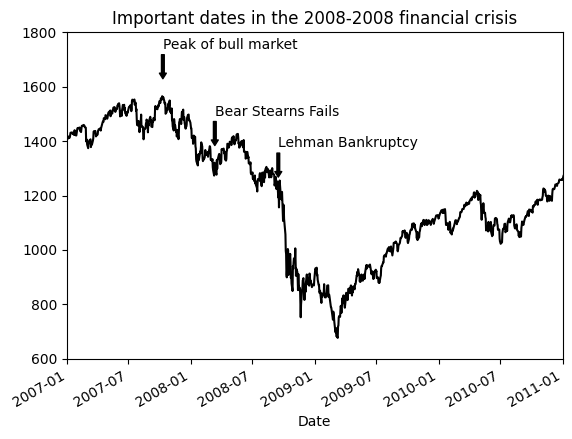

In [63]:
# 야후 파이낸스에서 얻은 2007년 S&P 500 지수 데이터로 그래프 생성
from datetime import datetime

fig, ax = plt.subplots()

# 데이터 읽기
data = pd.read_csv(path + 'spx.csv', index_col=0, parse_dates=True)
spx = data["SPX"]

# 그래프 생성
spx.plot(ax=ax, color="black")

# 08-09 금융위기 중 중요한 날을 주석으로 추가
crisis_data = [
    (datetime(2007, 10, 11), "Peak of bull market"),
    (datetime(2008, 3, 12), "Bear Stearns Fails"),
    (datetime(2008, 9, 15), "Lehman Bankruptcy")
]

# annotate 메서드 사용해 화살표 추가
for date, label in crisis_data:
  ax.annotate(label, xy=(date, spx.asof(date) + 75),
              # xy: 화살표 위치
              # asof 메서드는 인덱스 기준으로 where 이전에 결측치가 없는 마지막 행을 구함
              # xytext: 텍스트 위치
              xytext=(date, spx.asof(date) + 225),
              # arrowprops: 화살표 속성 설정 옵션
              arrowprops=dict(facecolor="black", headwidth=5, width=2,
                              headlength=4),
              # facecolor: 화살표 채우기 색
              # edgecolor: 테두리 색
              # shrink: 화살표 길이
              # alpha: 투명도
              # arrowstyle: 화살표 스타일
              horizontalalignment="left", verticalalignment="top")

# 2007-2010 구간으로 확대
ax.set_xlim(["1/1/2007", "1/1/2011"]) # x축 범위
ax.set_ylim([600, 1800]) # y축 범위

# 그래프 제목 설정
ax.set_title("Important dates in the 2008-2008 financial crisis")

#### matplotlib.patches
- https://matplotlib.org/stable/api/patches_api.html

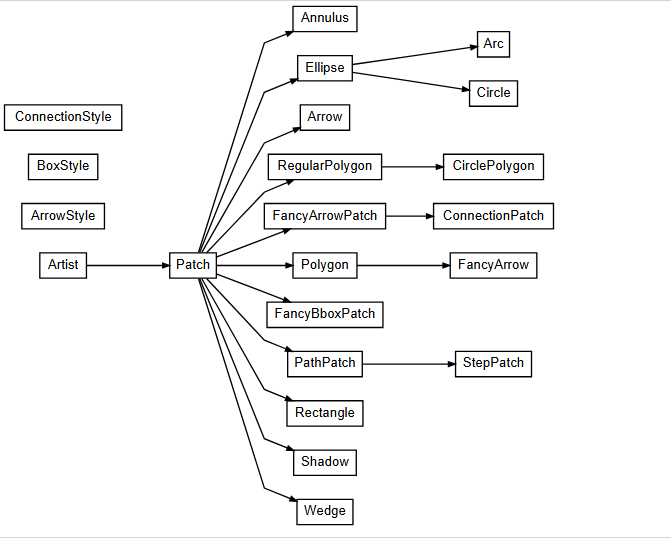

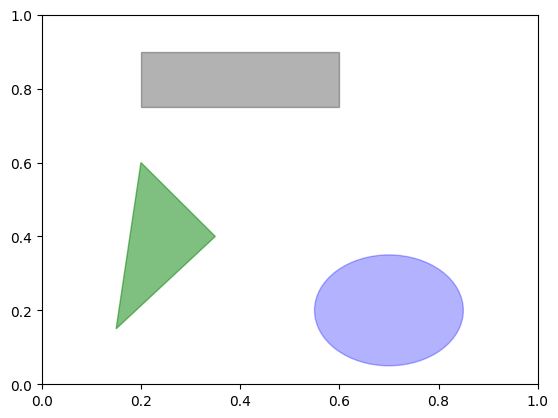

In [66]:
# 그래프에 도형 추가하기
# patch 객체 만들고 ax.add_patch 호출 (서브플롯에 ax 객체 추가)
fig, ax = plt.subplots()

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color="black", alpha=0.3) #직사각형
circ = plt.Circle((0.7, 0.2), 0.15, color="blue", alpha=0.3) #원
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color="green", alpha=0.5) # 다각형

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

### 9.1.5 그래프를 파일로 저장하기
- savefig 메서드를 이용해 파일로 저장
- 파일 확장자는 svg, pdf, png 등 다양
- 문법 예: fig.savefig("figpath.png", dpi=400)
<br>[fig.savefig 옵션]
- frame: 파일 경로나 파이썬의 유사한 객체를 나타내는 문자열. 저장되는 포맷은 파일 확장자를 통해 결정
- dpi: 피겨의 인치당 도트 해상도. 기본값은 100
- facecolor, edgecolor: 서브플롯 바깥 배경 색
- format: 명시적인 파일 포맷

In [67]:
fig.savefig("figpath.png", dpi=400)

### 9.1.6 맷플롯립 설정
- 맷플롯립 환경 설정 시스템은 rc 메서드를 사용해서 프로그래밍적으로 설정 가능
> 그래프 크기, 서브플롯 간격, 색상, 글자 크기, 격자 스타일 등
- 현재 설정된 모든 설정값 확인하기: plt.rcParams
- 기본값으로 복원하기: plt.rcdefaults()
- rc 메서드
> 첫 번째 인수: 설정하려는 figure, axes, xtick, ytick, grid, legend
> <br>두 번째 인수: 설정할 값에 대한 키워드 인수


In [68]:
# 피겨의 크기 10 * 10 으로 설정
plt.rc("figure", figsize=(10, 10))

In [69]:
# 현재 설정된 모든 설정값 확인하기
plt.rcParams

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': ['-layers', 'OptimizePlus'],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': False,
          'axes.grid.axis': 'both',
   

In [70]:
plt.rc("font", family="monospace", weight="bold", size=8)

## 9.2 판다스에서 시본으로 그래프 그리기
- 시본(seaborn): 맷플롯립 기반의 고차원 통계 그래픽 라이브러리

### 9.2.1 선 그래프
- Series 객체의 색인은 맷플롯립에서 그래프 생성 시 x축으로 해석됨
- use_index=False 옵션: 색인을 그래프의 축으로 사용하는 것 방지
- xticks, xlim 옵션: x축의 눈금과 한계 조절 (y축은 yticks, ylim)
###<br> [Series.plot 메서드 인수]
- label: 그래프의 범례 이름
- ax: 그래프를 그릴 맷플롯립의 서브플롯 객체. (아무것도 넘어오지 않을 경우 현재 활성화되어 있는 맷플롯립의 서브플롯 사용)
- style: 맷플롯립에 전달한 ko-- 같은 스타일 문자열
- alpha: 그래프 투명도(0~1)
- kind: 그래프 종류(area, bar, barh, density, hist, kde, line, pie)
- figsize: 생성할 그래프 크기(튜플로 지정)
- logx: True - x축에 대해 로그 스케일 적용 (음수 값 허용하는 대칭 로그의 경우 sym)
- logy: y축에 대해 로그 스케일 적용 (음수 값 허용하는 대칭 로그의 경우 sym)
- title: 그래프 제목으로 사용할 문자열
- use_index: 객체의 색인을 눈금 이름으로 사용할지 여부
- rot: 눈금 이름 회전(0~360)
- xticks: x축으로 사용할 값
- yticks: y축으로 사용할 값
- xlim: x축 한계 [부터, 까지]
- ylim: y축 한계
- grid: 축의 그리드 표시 여부 (기본값은 켬)
###<br> [DataFrame의 plot 메서드 인수]
- subplots: 각 DataFrame의 열을 독립된 서브플롯에 그림
- layouts: 서브플롯의 레이아웃을 제공하는 2-튜플(행, 열)
- sharex: subplots=True 인 경우 같은 x축 공유 및 눈금과 한계 연결
- sharey: subplots=True 인 경우 같은 y축 공유 및 눈금과 한계 연결
- legend: 서브플롯의 범례 추가(기본값 True)
- sort_columns: 열을 알파벳 순서로 그림. (기본값은 존재하는 열 순서)


<Axes: >

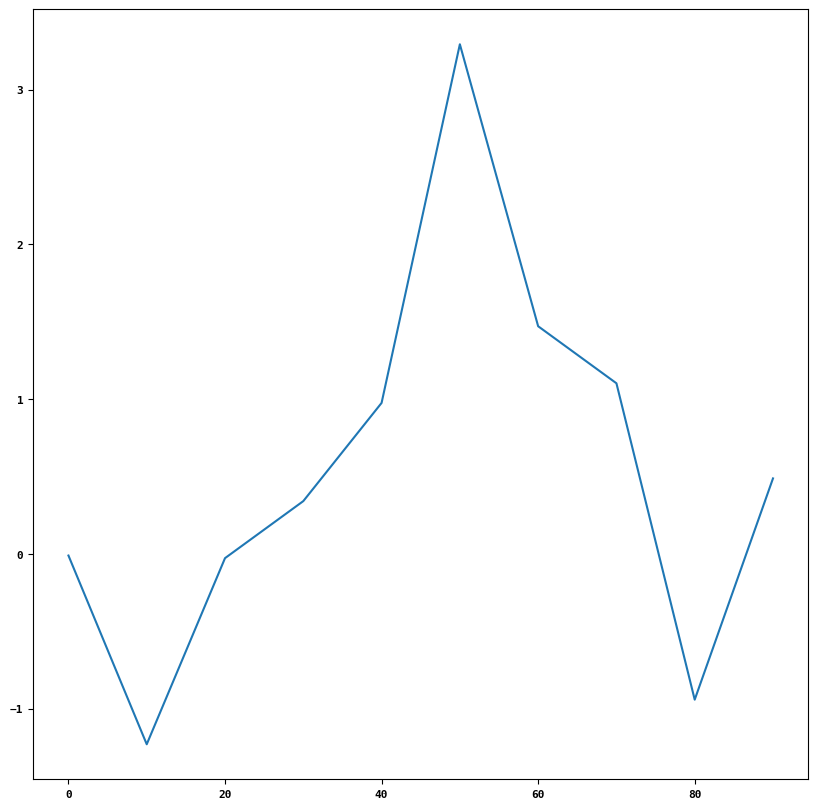

In [72]:
s = pd.Series(np.random.standard_normal(10).cumsum(), index=np.arange(0, 100, 10))
s.plot()

<Axes: >

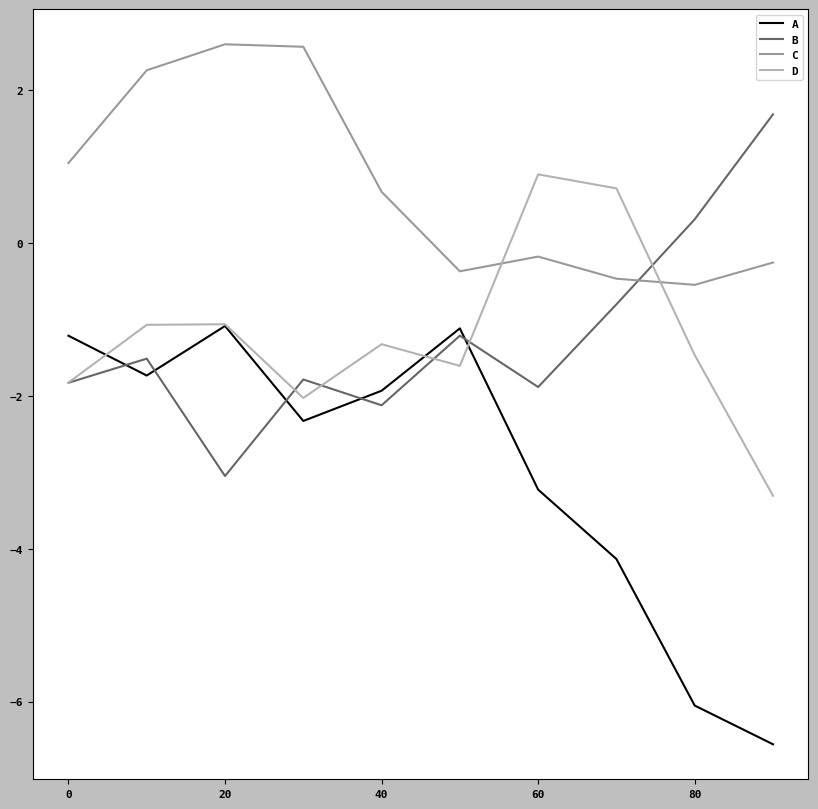

In [73]:
# DataFrame의 plot 메서드는 하나의 서브플롯 안에 각 열별로 선 그래프 그림
# 자동으로 범례 생성
df = pd.DataFrame(np.random.standard_normal((10, 4)).cumsum(0),
                  columns=["A", "B", "C", "D"],
                  index=np.arange(0, 100, 10)) # 0부터 100까지 10단위

plt.style.use('grayscale')
df.plot()

### 9.2.2 막대그래프
- plot.bar(): 수직 막대 그래프
- plot.barh(): 수평 막대 그래프
- DataFrame의 색인: 수직 막대 그래프 - x / 수평 막대 그래프 - y

<Axes: >

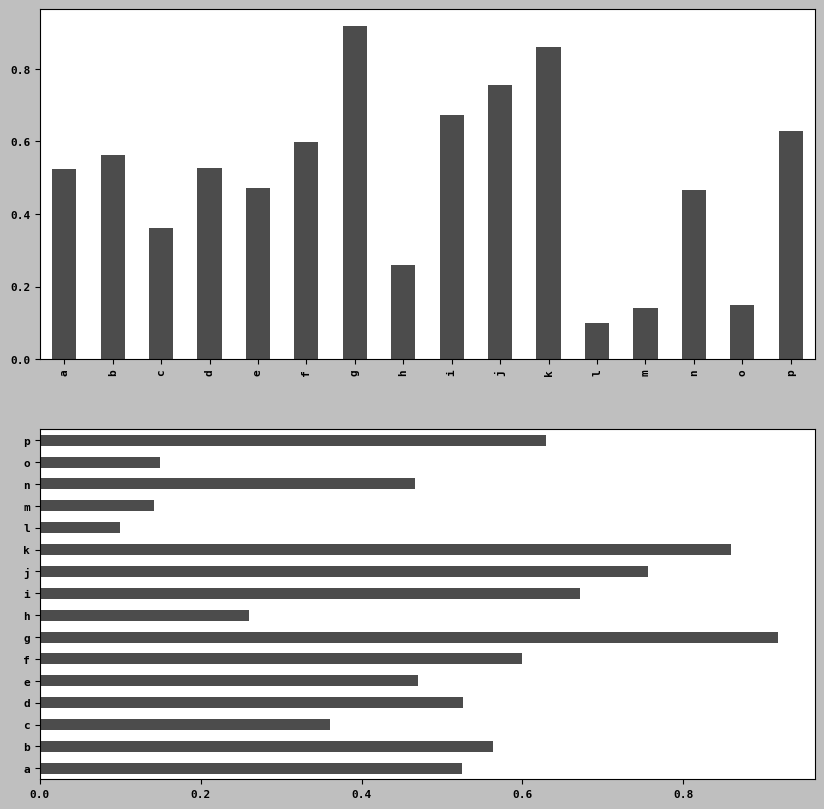

In [74]:
fig, axes = plt.subplots(2, 1)

data = pd.Series(np.random.uniform(size=16), index=list("abcdefghijklmnop"))

data.plot.bar(ax=axes[0], color="black", alpha=0.7)
data.plot.barh(ax=axes[1], color="black", alpha=0.7)

#### DataFrame에서 막대그래프

In [75]:
# 각 행의 값을 함께 묶어 하나의 그룹마다 각각의 막대를 보여줌
df = pd.DataFrame(np.random.uniform(size=(6, 4)),
                  index=["one", "two", "three", "four", "five", "six"],
                  columns=pd.Index(["A","B","C","D"], name="Genus") # 범례 제목: Genus
                  )

df

Genus,A,B,C,D
one,0.693376,0.718815,0.851315,0.857050
two,0.327598,0.746037,0.568164,0.065220
three,0.506142,0.004380,0.904567,0.662054
four,0.896261,0.662046,0.371500,0.897143
five,0.715735,0.307832,0.045387,0.115437
six,0.896273,0.351468,0.275941,0.838262


<Axes: >

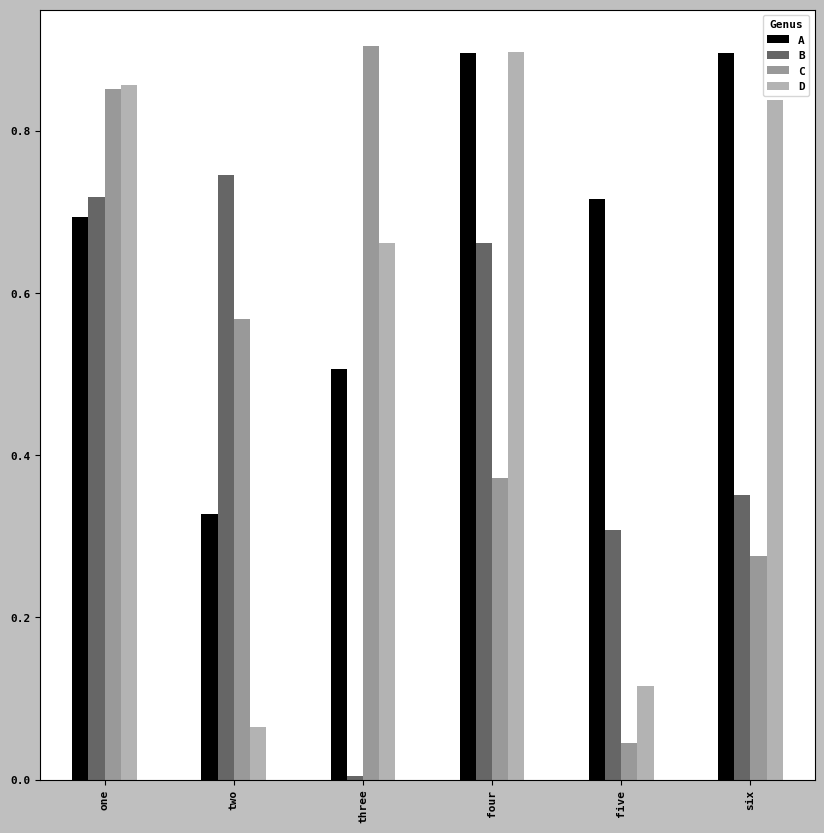

In [76]:
df.plot.bar()

#### 누적 막대 그래프
- stacked=True 옵션 사용
- 각 행의 값들이 하나의 막대에 누적되어 출력
- Series의 value_counts: s.value_counts().plot.bar() 이용하여 값의 빈도 시각화

<Axes: >

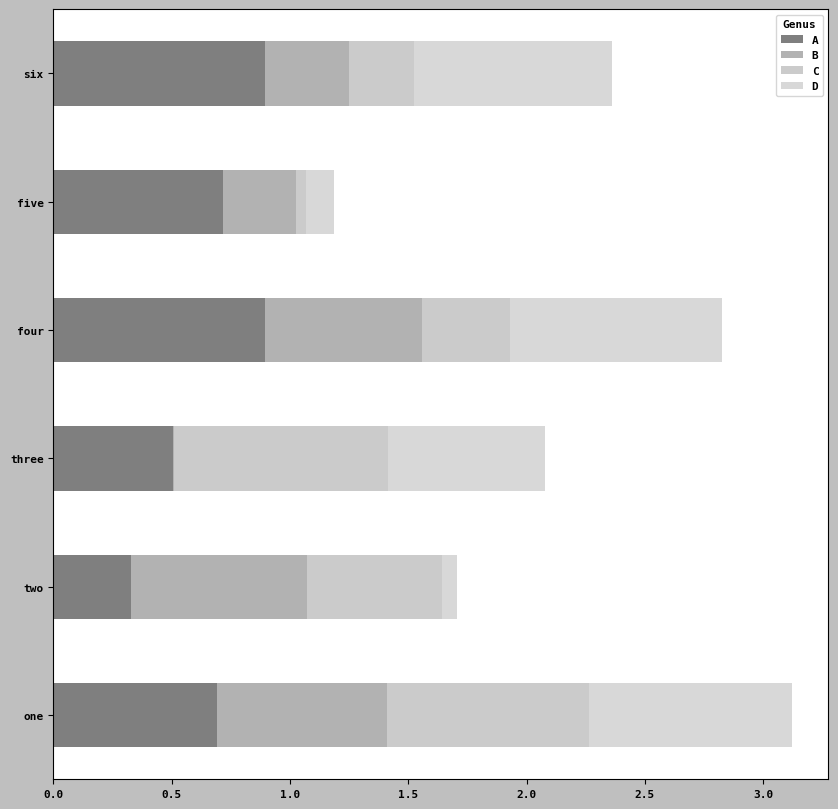

In [78]:
df.plot.barh(stacked=True, alpha=0.5)

#### 레스토랑 팁 데이터셋 예제
- 요일별로 열핀 파티 개수, 파티 개수 대비 팁 비율 시각화하는 누적 막대 그래프 그리기

In [79]:
# 파일 불러오기
tips = pd.read_csv(path + 'tips.csv')
tips.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [82]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   smoker      244 non-null    object 
 3   day         244 non-null    object 
 4   time        244 non-null    object 
 5   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 11.6+ KB


#### tips Data 정보
- total_bill: 총 결제 금액
- tip: 팁
- smoker: 흡연자 여부
- day: 요일
- time: 점심(lunch) 저녁(dinner)
- size: 인원

In [80]:
# 요일과 파티 개수 교차 테이블 생성

# 요일별 파티 개수
# pd.crosstab 함수: 두 DataFrame 열에서 간단한 빈도표 출력 가능
party_counts = pd.crosstab(tips["day"], tips["size"])

party_counts.head()

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [81]:
# 요일로 색인 재지정
party_counts = party_counts.reindex(index=["Thur", "Fri", "Sat", "Sun"])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Thur,1,48,4,5,1,3
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1


In [85]:
# 파티 인원이 한 명 또는 여섯 명인 파티 제외
party_counts = party_counts.loc[:, 2:5] # size: 파티 인원 규모

# 각 행의 합이 1이 되도록 정규화
party_pcts = party_counts.div(party_counts.sum(axis="columns"), axis="index")
party_pcts

size,2,3,4,5
day,,,,
Thur,0.827586,0.068966,0.086207,0.017241
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000


<Axes: xlabel='day'>

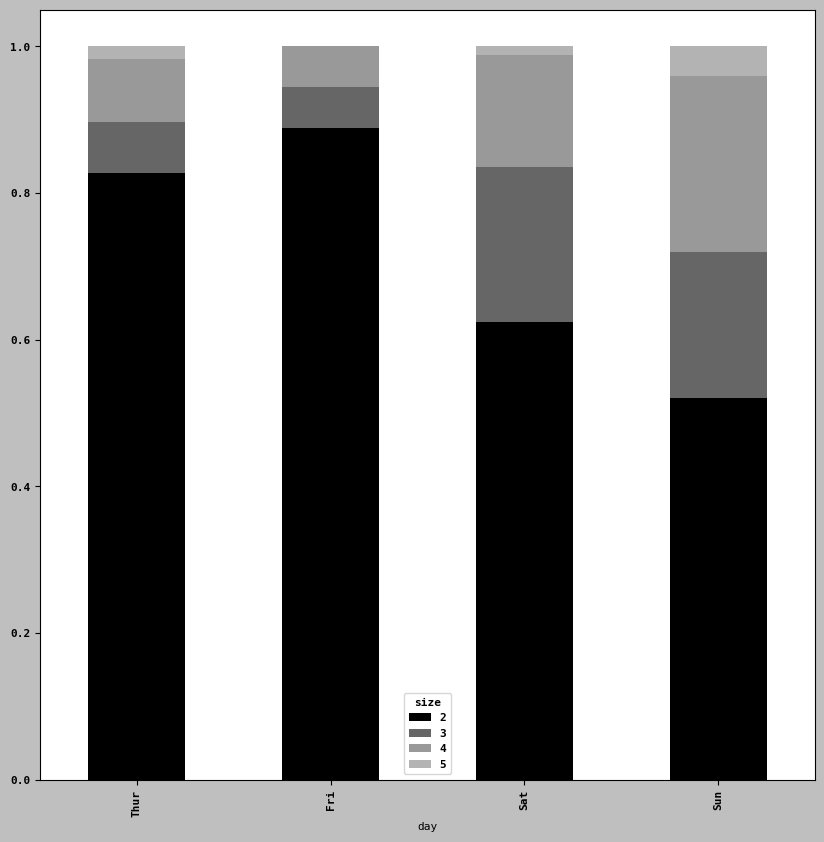

In [89]:
# 누적 막대 그래프 생성
party_pcts.plot.bar(stacked=True)

#### seaborn 패키지
- 시본 그래프 함수의 data 인수: 판다스의 DataFrame
- x="x축 값"
- y="y축 값"
- orient 매개변수 (h, v): h - 수평 / v - 수직
- hue 옵션: 추가 분류
- seaborn.set_style 메서드로 스타일 변경 가능

In [91]:
# !pip install seaborn

In [92]:
import seaborn as sns

In [95]:
tips["tip_pct"] = tips["tip"] / (tips["total_bill"] - tips["tip"])
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pc,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069,0.172069


<Axes: xlabel='tip_pct', ylabel='day'>

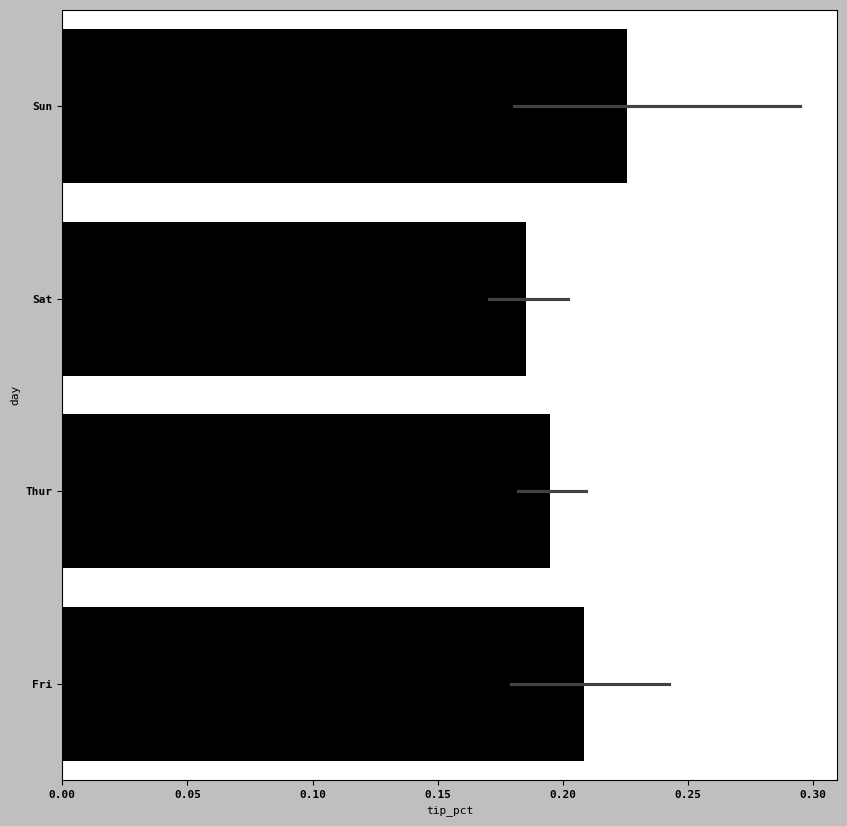

In [96]:
sns.barplot(x="tip_pct", y="day", data=tips, orient="h")
# 막대 그래프의 선은 95% 신뢰 구간

<Axes: xlabel='tip_pct', ylabel='day'>

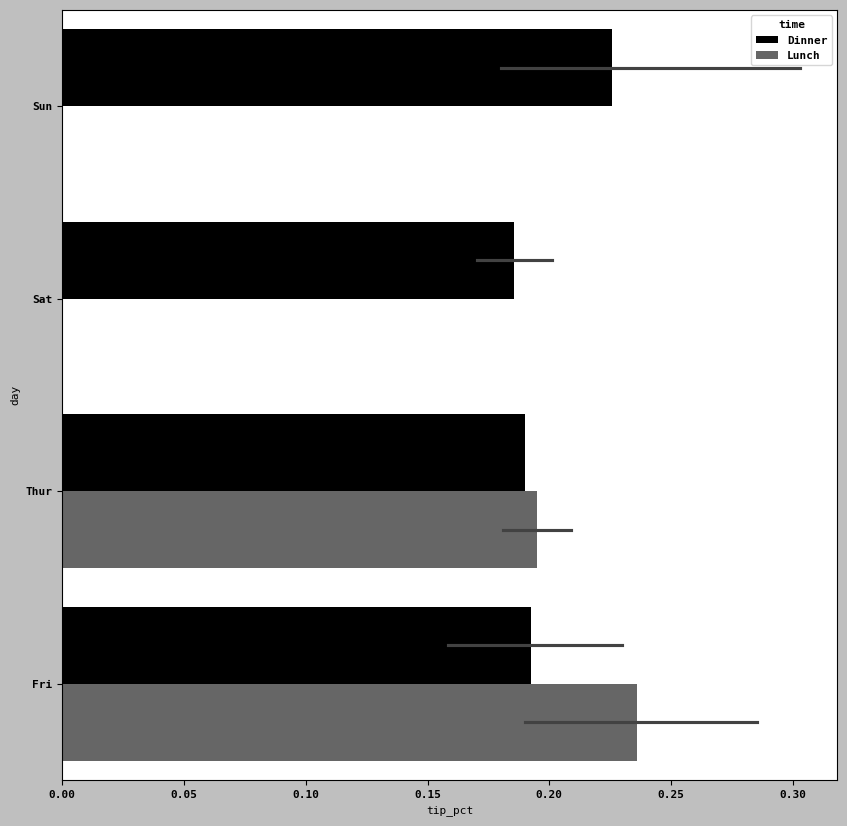

In [97]:
# hue 옵션
sns.barplot(x="tip_pct", y="day", hue="time", data=tips, orient="h")

In [98]:
# seaborn.set_style 메서드
sns.set_style("whitegrid")

In [100]:
# 흑백 출력
sns.set_palette("Greys_r")

### 9.2.3 히스토그램과 밀도 그래프
[히스토그램]
- 히스토그램: 값의 빈도를 분리해서 보여주는 막대그래프의 한 종류
- 히스토그램 데이터 포인트는 분리되어 균일한 간격의 막대로 표현
- 데이터의 숫자가 막대의 높이로 표현
- plot.hist 메서드를 이용해서 생성

[밀도 그래프]
- 밀도 그래프: 관찰값을 사용해서 추정되는 연속된 확률분포(정규분포) 그림.
- 밀도 그래프는 KDE(커널 밀도 추정) 그래프
- plot.density 이용해서 생성

[정규 혼합 히스토그램]
- 시본 라이브러리의 histplot 메서드를 이용해 히스토그램과 밀도 그래프 생성가능

<Axes: ylabel='Frequency'>

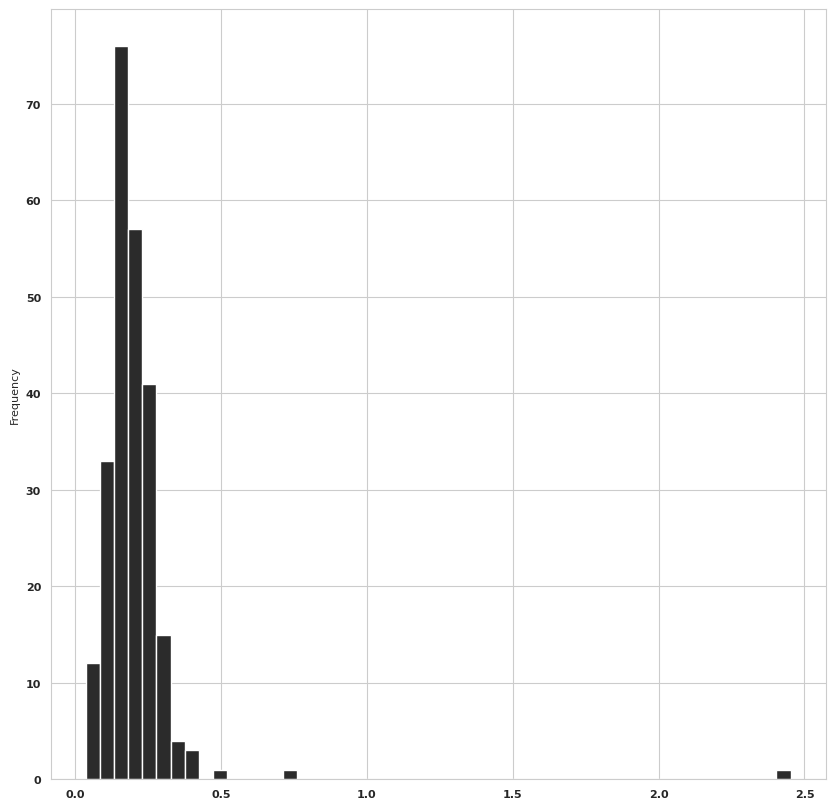

In [101]:
# 전체 결제 금액 대비 팁 비율 히스토그램 그리기
tips["tip_pct"].plot.hist(bins=50)

<Axes: ylabel='Density'>

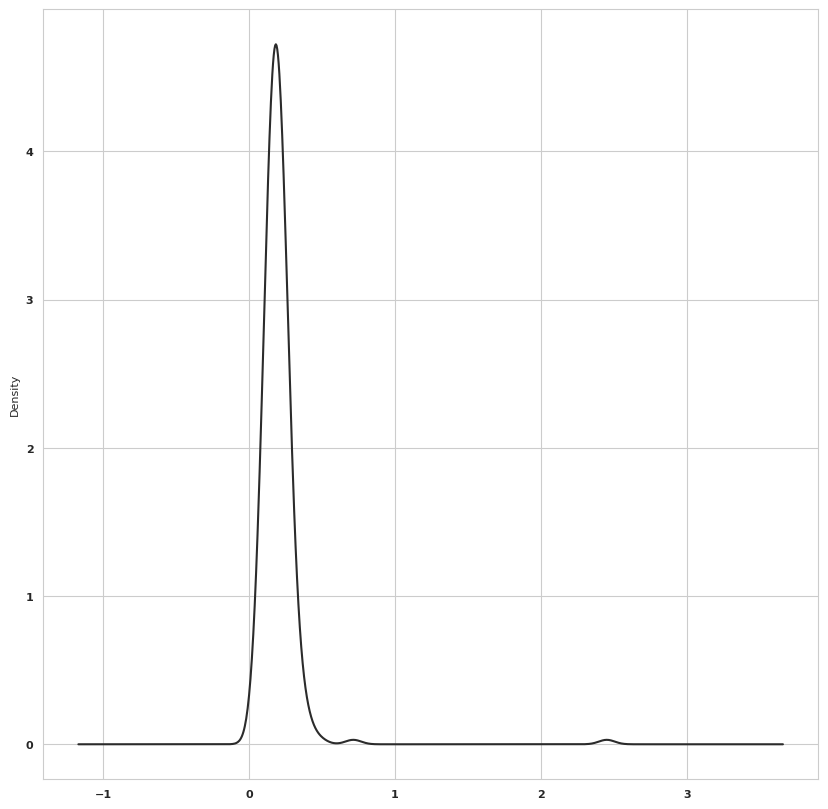

In [102]:
# 밀도 그래프
tips["tip_pct"].plot.density()

<Axes: ylabel='Count'>

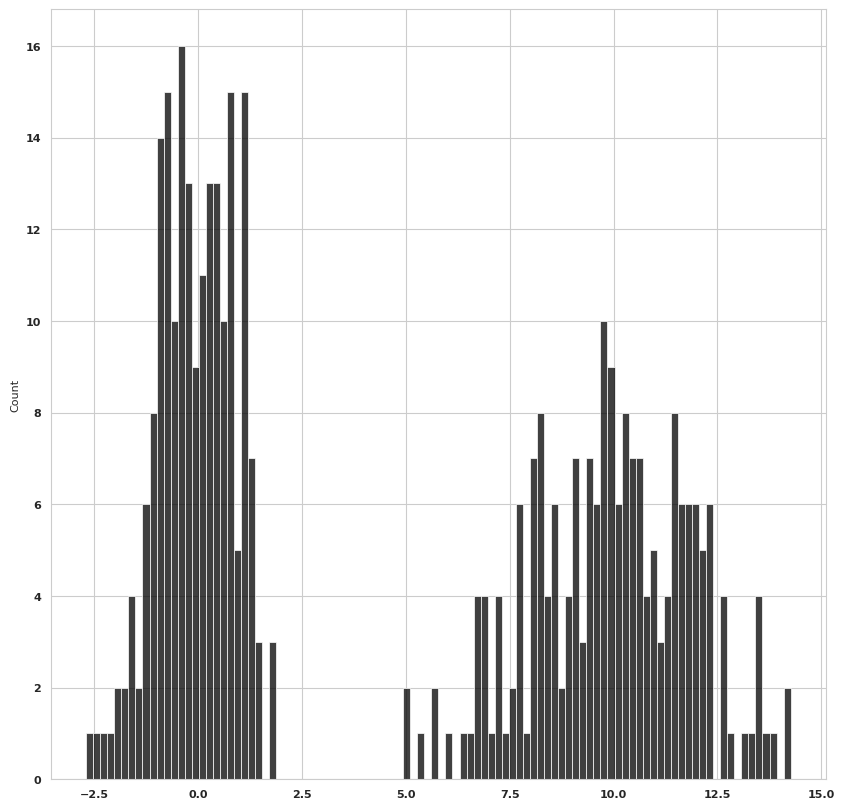

In [103]:
# 시본 라이브러리의 histplot 메서드를 이용해 히스토그램과 밀도 그래프 생성하기
comp1 = np.random.standard_normal(200)

comp2 = 10 + 2 * np.random.standard_normal(200)

values = pd.Series(np.concatenate([comp1, comp2]))

# 정규 혼합 히스토그램
sns.histplot(values, bins=100, color="black")

### 9.2.4 산포도(scatter plot, point plot)
- 산포도: 두 개의 1차원 데이터 묶음 간의 관계를 나타낼 때 유용.
- regplot 메서드: 산포도와 선형 회귀선 그리기
- 산포도 행렬: 탐색적 데이터 분석에서 변수 그룹 간의 모든 산포도 (시본에서는 pairplot 함수로 생성)
- 산포도 행렬은 여러 변수들의 관계 양상을 보여줄 수 있다. 변수들의 모든 이원 조합 그래프를 생성한 후, 행렬에서 변수 간 관계를 표시하여 중요도가 높을 수 있는 관계를 강조해서 나타낼 수 있다

In [105]:
macro = pd.read_csv(path + 'macrodata.csv')

macro.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [106]:
data = macro[["cpi", "m1", "tbilrate", "unemp"]]

# log: 주어진 데이터에 대한 자연로그 계산
# diff: 주어진 축을 따라 n번째 이산 차이를 계산
# dropna: 결측값 제외
trans_data = np.log(data).diff().dropna()
trans_data.head()

,cpi,m1,tbilrate,unemp
1,0.005849,0.014215,0.088193,-0.128617
2,0.006838,-0.008505,0.215321,0.038466
3,0.000681,-0.003565,0.125317,0.055060
4,0.005772,-0.002861,-0.212805,-0.074108
5,0.000338,0.004289,-0.266946,0.000000


Text(0.5, 1.0, 'Changes in log(m1) versus log(unemp)')

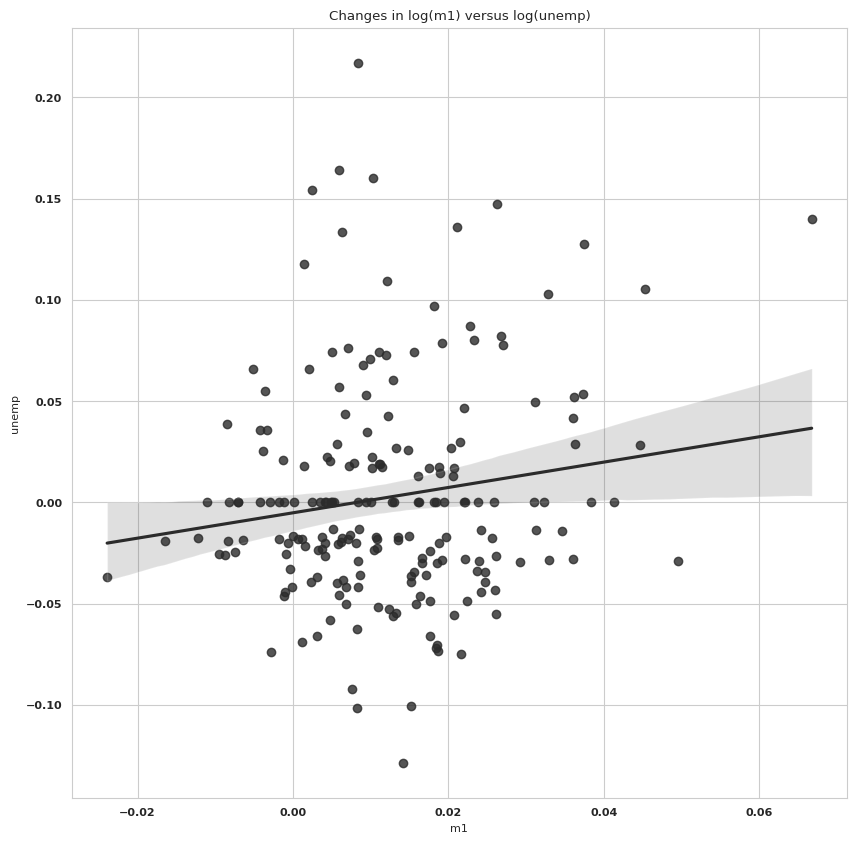

In [107]:
# regplot 메서드: 산포도와 선형 회귀선 그리기
ax = sns.regplot(x="m1", y="unemp", data=trans_data)

# 그래프 제목 설정
ax.set_title("Changes in log(m1) versus log(unemp)")

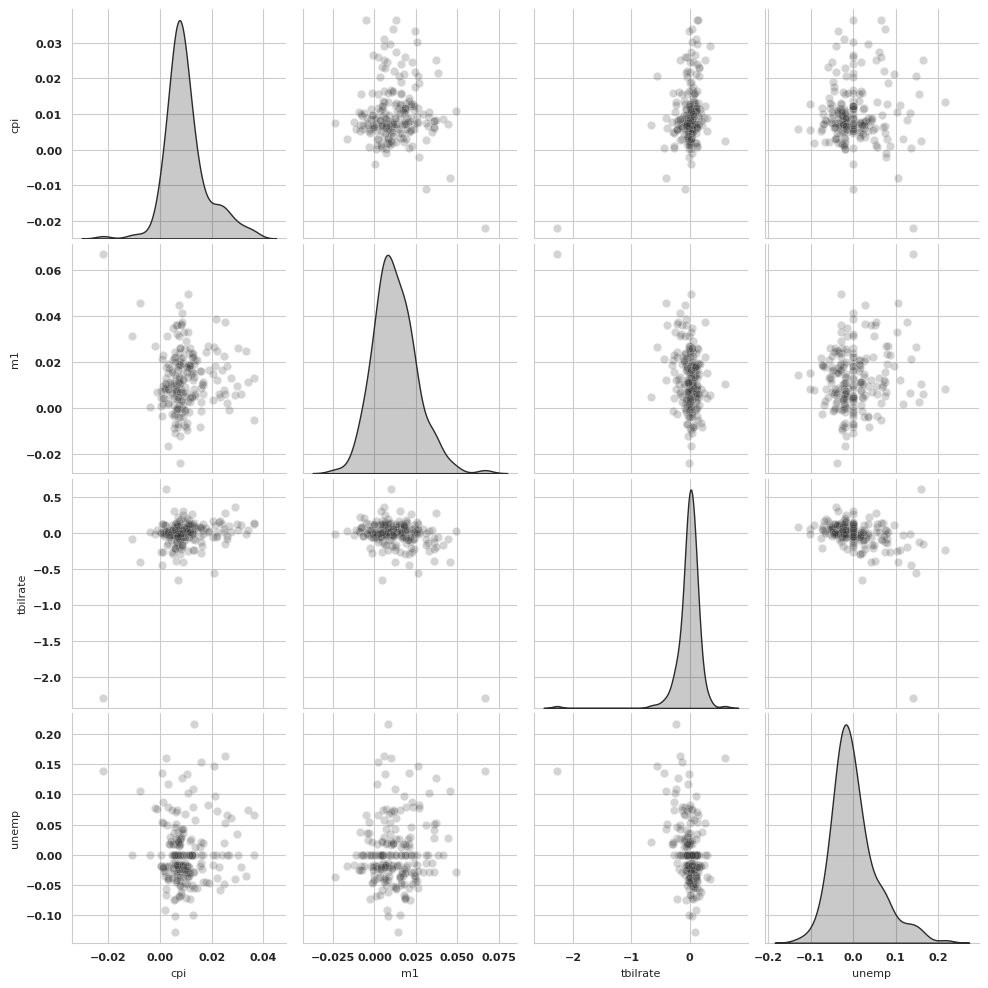

In [108]:
# 산포도 행렬
# 대각선 그래프 기본값(diag_kind) : 기본값은 히스토그램
# plot_kws: 각 그래프에 전달할 개별 설정값 지정
sns.pairplot(trans_data, diag_kind="kde", plot_kws={"alpha":0.2})

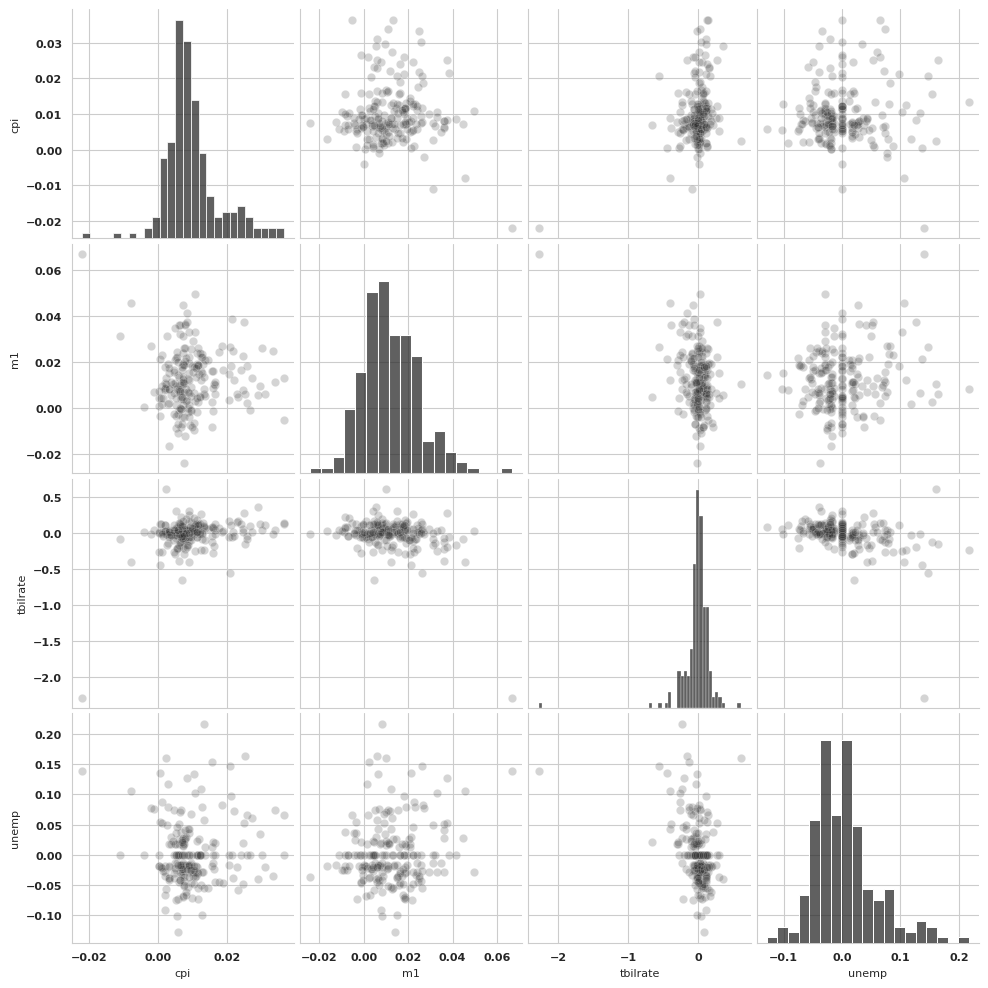

In [109]:
# 대각선 그래프 기본값(diag_kind) : 기본값은 히스토그램
sns.pairplot(trans_data, plot_kws={"alpha":0.2})

### 9.2.5 패싯 그리드와 범주형 데이터
- 패싯 그리드(facet grid): 2차원 레이아웃으로 그래프를 배치해 특정 변수의 구별되는 값을 각 축으로 비교 가능
- 다양한 범주형 값을 갖는 데이터를 시각화하는 한 가지 방법
- 시본의 내장 함수인 catplot을 이용해 다양한 측면을 나타내는 그래프를 쉽게 그릴 수 있음
- 시본의 FacetGrid 문서: https://seaborn.pydata.org/generated/seaborn.FacetGrid.html

[동적 대화형 그래프 도구]
- 알테어: https://altair-viz.github.io/
- 보케: https://docs.bokeh.org/en/latest/
- 플로틀리: https://plotly.com/python/



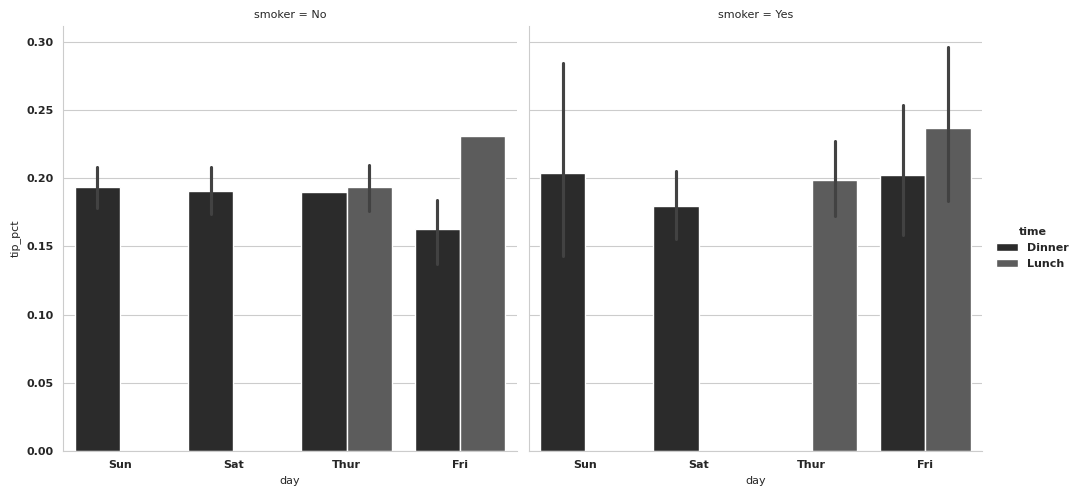

In [110]:
# 요일/시간/흡연 여부에 따른 팁 비율
# data는 tips의 tip_pct가 1 미만인 데이터만 포함
sns.catplot(x="day", y="tip_pct", hue="time", col="smoker",
            kind="bar", data=tips[tips.tip_pct < 1]) # 그래프 종류: 막대그래프

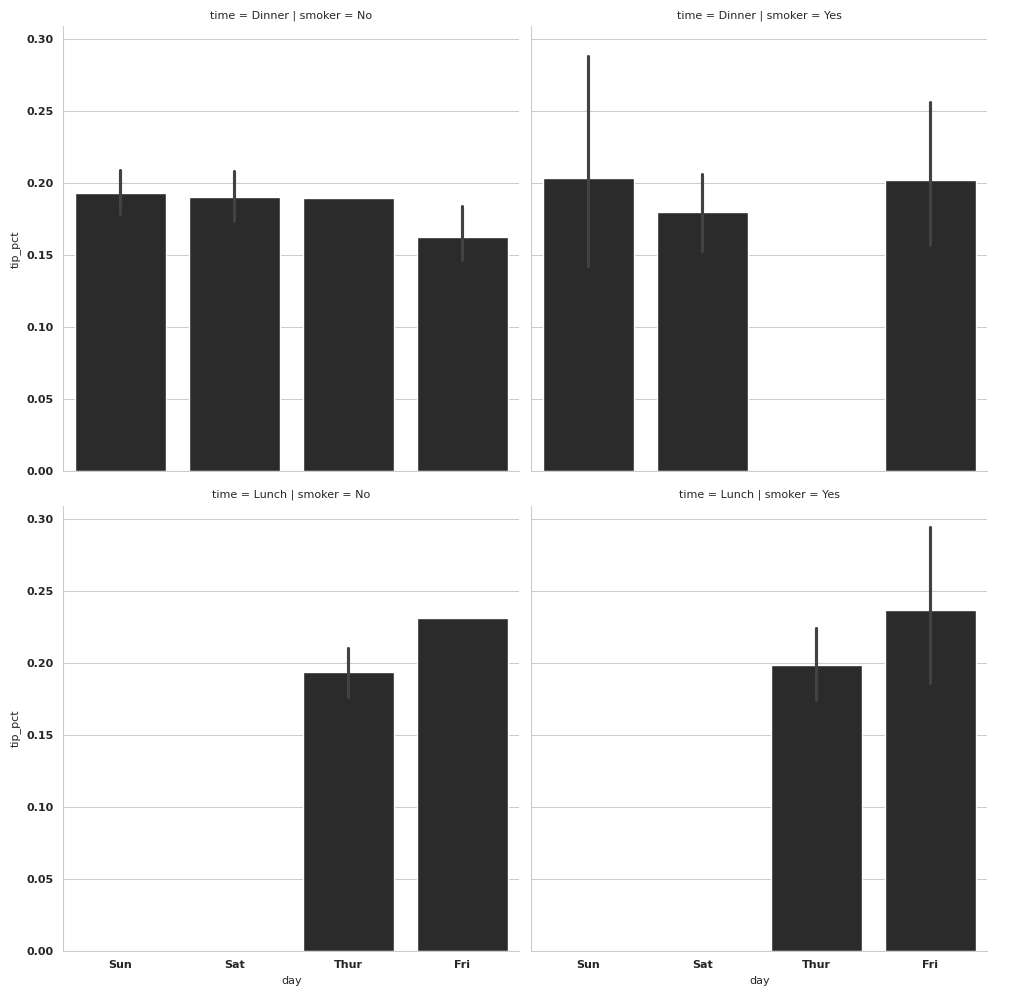

In [111]:
# 시간과 흡연 여부도 함께 나타나는 요일별 팁 비율 그래프
# "time"으로 그룹을 만드는 대신 패싯 안에서 막대그래프의 색을 달리해서 보여주기
sns.catplot(x="day", y="tip_pct", row="time",
            col="smoker",
            kind="bar", data=tips[tips.tip_pct < 1])

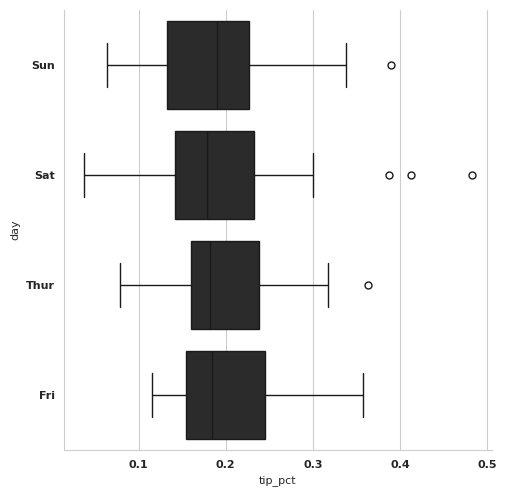

In [112]:
# catplot은 여러 종류의 그래프 지원
# boxplot 그려보기
sns.catplot(x="tip_pct", y="day", kind="box",
            data=tips[tips.tip_pct < 0.5])